In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
bitcoin_path = "Resources/coin_Bitcoin.csv"
ethereum_path = "Resources/coin_Ethereum.csv"
cardano_path = "Resources/coin_Cardano.csv"
dogecoin_path = "Resources/coin_Dogecoin.csv"
polkadot_path = "Resources/coin_Polkadot.csv"

# Read the crypto history data and form dataframes
bitcoinData = pd.read_csv(bitcoin_path)
ethereumData = pd.read_csv(ethereum_path)
cardanoData = pd.read_csv(cardano_path)
dogecoinData = pd.read_csv(dogecoin_path)
polkadotData = pd.read_csv(polkadot_path)

bitData_df = pd.DataFrame(bitcoinData)
ethData_df = pd.DataFrame(ethereumData)
anaData_df = pd.DataFrame(cardanoData)
dogeData_df = pd.DataFrame(dogecoinData)
dotData_df = pd.DataFrame(polkadotData)

In [24]:
# cleaning data
# take only the date needed for correlation
# which is the MarketCap and the date

bitData_df = bitData_df[["Date","Name","Marketcap"]]
ethData_df = ethData_df[["Date","Name","Marketcap"]]
cardData_df = anaData_df[["Date","Name","Marketcap"]]
dogeData_df = dogeData_df[["Date","Name","Marketcap"]]
polkaData_df = dotData_df[["Date","Name","Marketcap"]]


In [25]:
# Bitcoin and Ethereum

# Merged the data based on the Date, assuming that the both cryptocurrencies have the same dates and also there are not 
# duplicates and no nan values

bit_vs_eth_df = pd.merge(bitData_df, ethData_df, on="Date", suffixes=("_Bitcoin", "_Dash"))
bit_vs_eth_df = bit_vs_eth_df.dropna()
duplicates = bit_vs_eth_df.duplicated(subset=["Date"])
duplicates.sum()

0

In [26]:
# Define a function for linear regrresion because we are going to repeat this procces for all crypto currencies

def linear_regression(x_values, y_values, title, y_label, annotate_x_y):
    x_values = x_values
    y_values = y_values
    correlation = st.pearsonr(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    intercept = "%.3E"%intercept
    r_value = f"\nR\u00b2: {round(rvalue**2, 3)}"
    line_eq = "y = " + str(round(slope,2)) + "x + " + intercept + r_value
    print()
    print(f"Market Cap Bitcoin vs {y_label}")
    print()
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.figure(figsize = (14,10))
    plt.scatter(x_values,y_values, edgecolor = "black")
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annotate_x_y, fontsize=15,color="red")
    
    # Label plot
    plt.title(title)
    
    # the x_axis label won't change because it is always Bitcoin
    plt.xlabel("Market Cap Bitcoin")
    plt.ylabel(y_label)
    plt.savefig(f"./output_data_ciochina/{title}.png")
    plt.show()


Market Cap Bitcoin vs Market Cap Ethereum

The correlation between both factors is 0.91


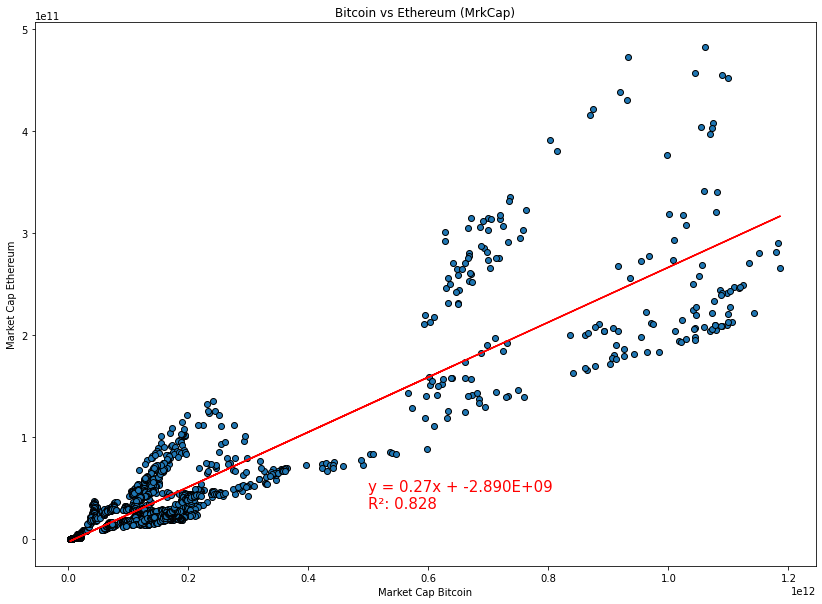

In [27]:
# Bitcoin vs Ethereum Market Capitalization correlation 

bit_mrk_cap = bit_vs_eth_df.iloc[:,2] # iloc[:,2] refers to Bitcoin Market Capt
eth_mrk_cap = bit_vs_eth_df.iloc[:,4] # iloc[:,4] refers to Ethereum Market Capt
linear_regression(x_values = bit_mrk_cap, y_values =eth_mrk_cap, title="Bitcoin vs Ethereum (MrkCap)",
                 y_label = "Market Cap Ethereum",annotate_x_y = (5e11,3e10))       


Market Cap Bitcoin vs Market Cap Cardano

The correlation between both factors is 0.87


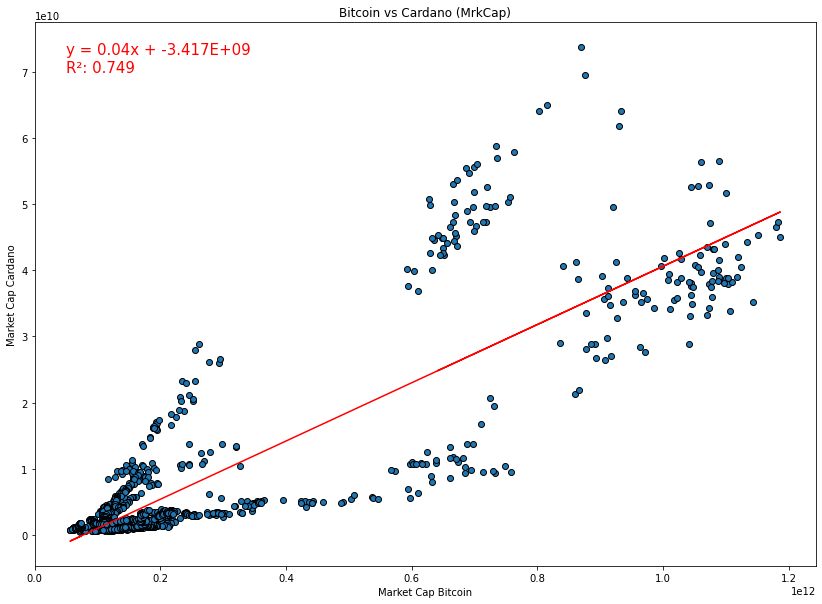

In [28]:
# Bitcoin vs Cardano Market Capitalization correlation 

bit_vs_card_df = pd.merge(bitData_df, cardData_df, on="Date", suffixes=("_Bitcoin", "_Card"))
bit_vs_card_df = bit_vs_card_df.dropna()
bit_vs_card_df
duplicates = bit_vs_card_df.duplicated(subset=["Date"])
duplicates.sum()

# Plotting
bit_mrk_cap = bit_vs_card_df.iloc[:,2]
card_mrk_cap = bit_vs_card_df.iloc[:,4]
linear_regression(x_values = bit_mrk_cap, y_values =card_mrk_cap, title="Bitcoin vs Cardano (MrkCap)",
                 y_label = "Market Cap Cardano",annotate_x_y = (0.5e11,7e10)) 


Market Cap Bitcoin vs Market Cap Doge

The correlation between both factors is 0.65


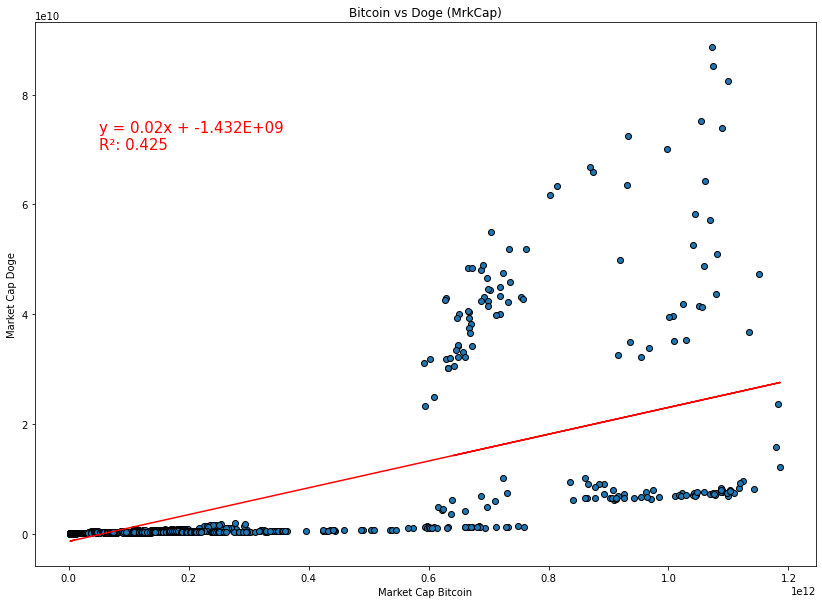

In [29]:
# Bitcoin vs Doge Market Capitalization correlation 

bit_vs_doge_df = pd.merge(bitData_df, dogeData_df, on="Date", suffixes=("_Bitcoin", "_Doge"))
bit_vs_doge_df = bit_vs_doge_df.dropna()
bit_vs_doge_df
duplicates = bit_vs_doge_df.duplicated(subset=["Date"])
duplicates.sum()

# Plotting
bit_mrk_cap = bit_vs_doge_df.iloc[:,2]
doge_mrk_cap = bit_vs_doge_df.iloc[:,4]
linear_regression(x_values = bit_mrk_cap, y_values =doge_mrk_cap, title="Bitcoin vs Doge (MrkCap)",
                 y_label = "Market Cap Doge",annotate_x_y = (0.5e11,7e10))


Market Cap Bitcoin vs Market Cap Polkadot

The correlation between both factors is 0.95


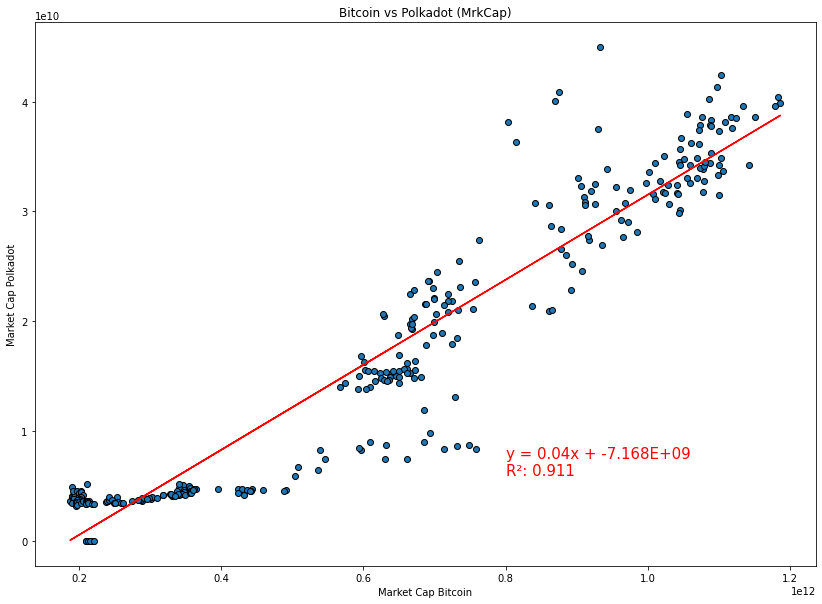

In [31]:
# Bitcoin vs Polkadot Market Capitalization correlation 

bit_vs_polka_df = pd.merge(bitData_df, polkaData_df, on="Date", suffixes=("_Bitcoin", "_Polkadot"))
bit_vs_polka_df = bit_vs_polka_df.dropna()
bit_vs_polka_df
duplicates = bit_vs_polka_df.duplicated(subset=["Date"])
duplicates.sum()

# Plotting
bit_mrk_cap = bit_vs_polka_df.iloc[:,2]
polka_mrk_cap = bit_vs_polka_df.iloc[:,4]
linear_regression(x_values = bit_mrk_cap, y_values =polka_mrk_cap, title="Bitcoin vs Polkadot (MrkCap)",
                 y_label = "Market Cap Polkadot",annotate_x_y = (8e11,6e9))